> This is a self-correcting activity generated by [nbgrader](https://nbgrader.readthedocs.io). Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Titanic

The goal of this activity is to predicts which passengers survived the Titanic shipwreck. It uses the famous [Kaggle Titanic dataset](https://www.kaggle.com/c/titanic/overview) which is a staple of ML challenges.

Here is a description of this dataset:

Variable|	Definition|	Key
-|-|-
PassengerId| 	Passenger ID| 	0 = No, 1 = Yes
Survived| 	Survival| 	0 = No, 1 = Yes
pclass| 	Ticket class| 	1 = 1st, 2 = 2nd, 3 = 3rd
Name|   Last and first names
sex| 	Sex 	
Age| 	Age in years 	
sibsp| 	# of siblings / spouses aboard the Titanic 	
parch| 	# of parents / children aboard the Titanic 	
ticket| 	Ticket number 	
fare| 	Passenger fare 	
cabin| 	Cabin number 	
embarked| 	Port of Embarkation| 	C = Cherbourg, Q = Queenstown, S = Southampton

## Environment setup

### Question

Import the necessary packages.

In [89]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [ ]:
# YOUR CODE HERE


## Data loading and analysis

### Question

- Use [pandas](https://pandas.pydata.org/) to import the dataset as CSV data from URL https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv.

- Print dataset shape.

In [62]:
# YOUR CODE HERE
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

### Question ###

Display 10 random samples from the dataset.

In [63]:
data.sample(n=10, random_state=42)

PassengerId  Survived  Pclass  \
709          710         1       3   
439          440         0       2   
840          841         0       3   
720          721         1       2   
39            40         1       3   
290          291         1       1   
300          301         1       3   
333          334         0       3   
208          209         1       3   
136          137         1       1   

                                                  Name     Sex   Age  SibSp  \
709  Moubarek, Master. Halim Gonios ("William George")    male   NaN      1   
439             Kvillner, Mr. Johan Henrik Johannesson    male  31.0      0   
840                        Alhomaki, Mr. Ilmari Rudolf    male  20.0      0   
720                  Harper, Miss. Annie Jessie "Nina"  female   6.0      0   
39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   
290                       Barber, Miss. Ellen "Nellie"  female  26.0      0   
300           Kelly, Miss. Anna Katherine "Annie Kate"  female   NaN      0   
333                    Vander Planke, Mr. Leo Edmondus    male  16.0      2   
208                          Carr, Miss. Helen "Ellen"  female  16.0      0   
136                       Newsom, Miss. Helen Monypeny  female  19.0      0   

     Parch            Ticket     Fare Cabin Embarked  
709      1              2661  15.2458   NaN        C  
439      0        C.A. 18723  10.5000   NaN        S  
840      0  SOTON/O2 3101287   7.9250   NaN        S  
720      1            248727  33.0000   NaN        S  
39       0              2651  11.2417   NaN        C  
290      0             19877  78.8500   NaN        S  
300      0              9234   7.7500   NaN        Q  
333      0            345764  18.0000   NaN        S  
208      0            367231   7.7500   NaN        Q  
136      2             11752  26.2833   D47        S

In [64]:
# YOUR CODE HERE


### Question

Print a concise summary of this dataset.

In [65]:
# YOUR CODE HERE
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### Question

Plot an histogram of numerical features.

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

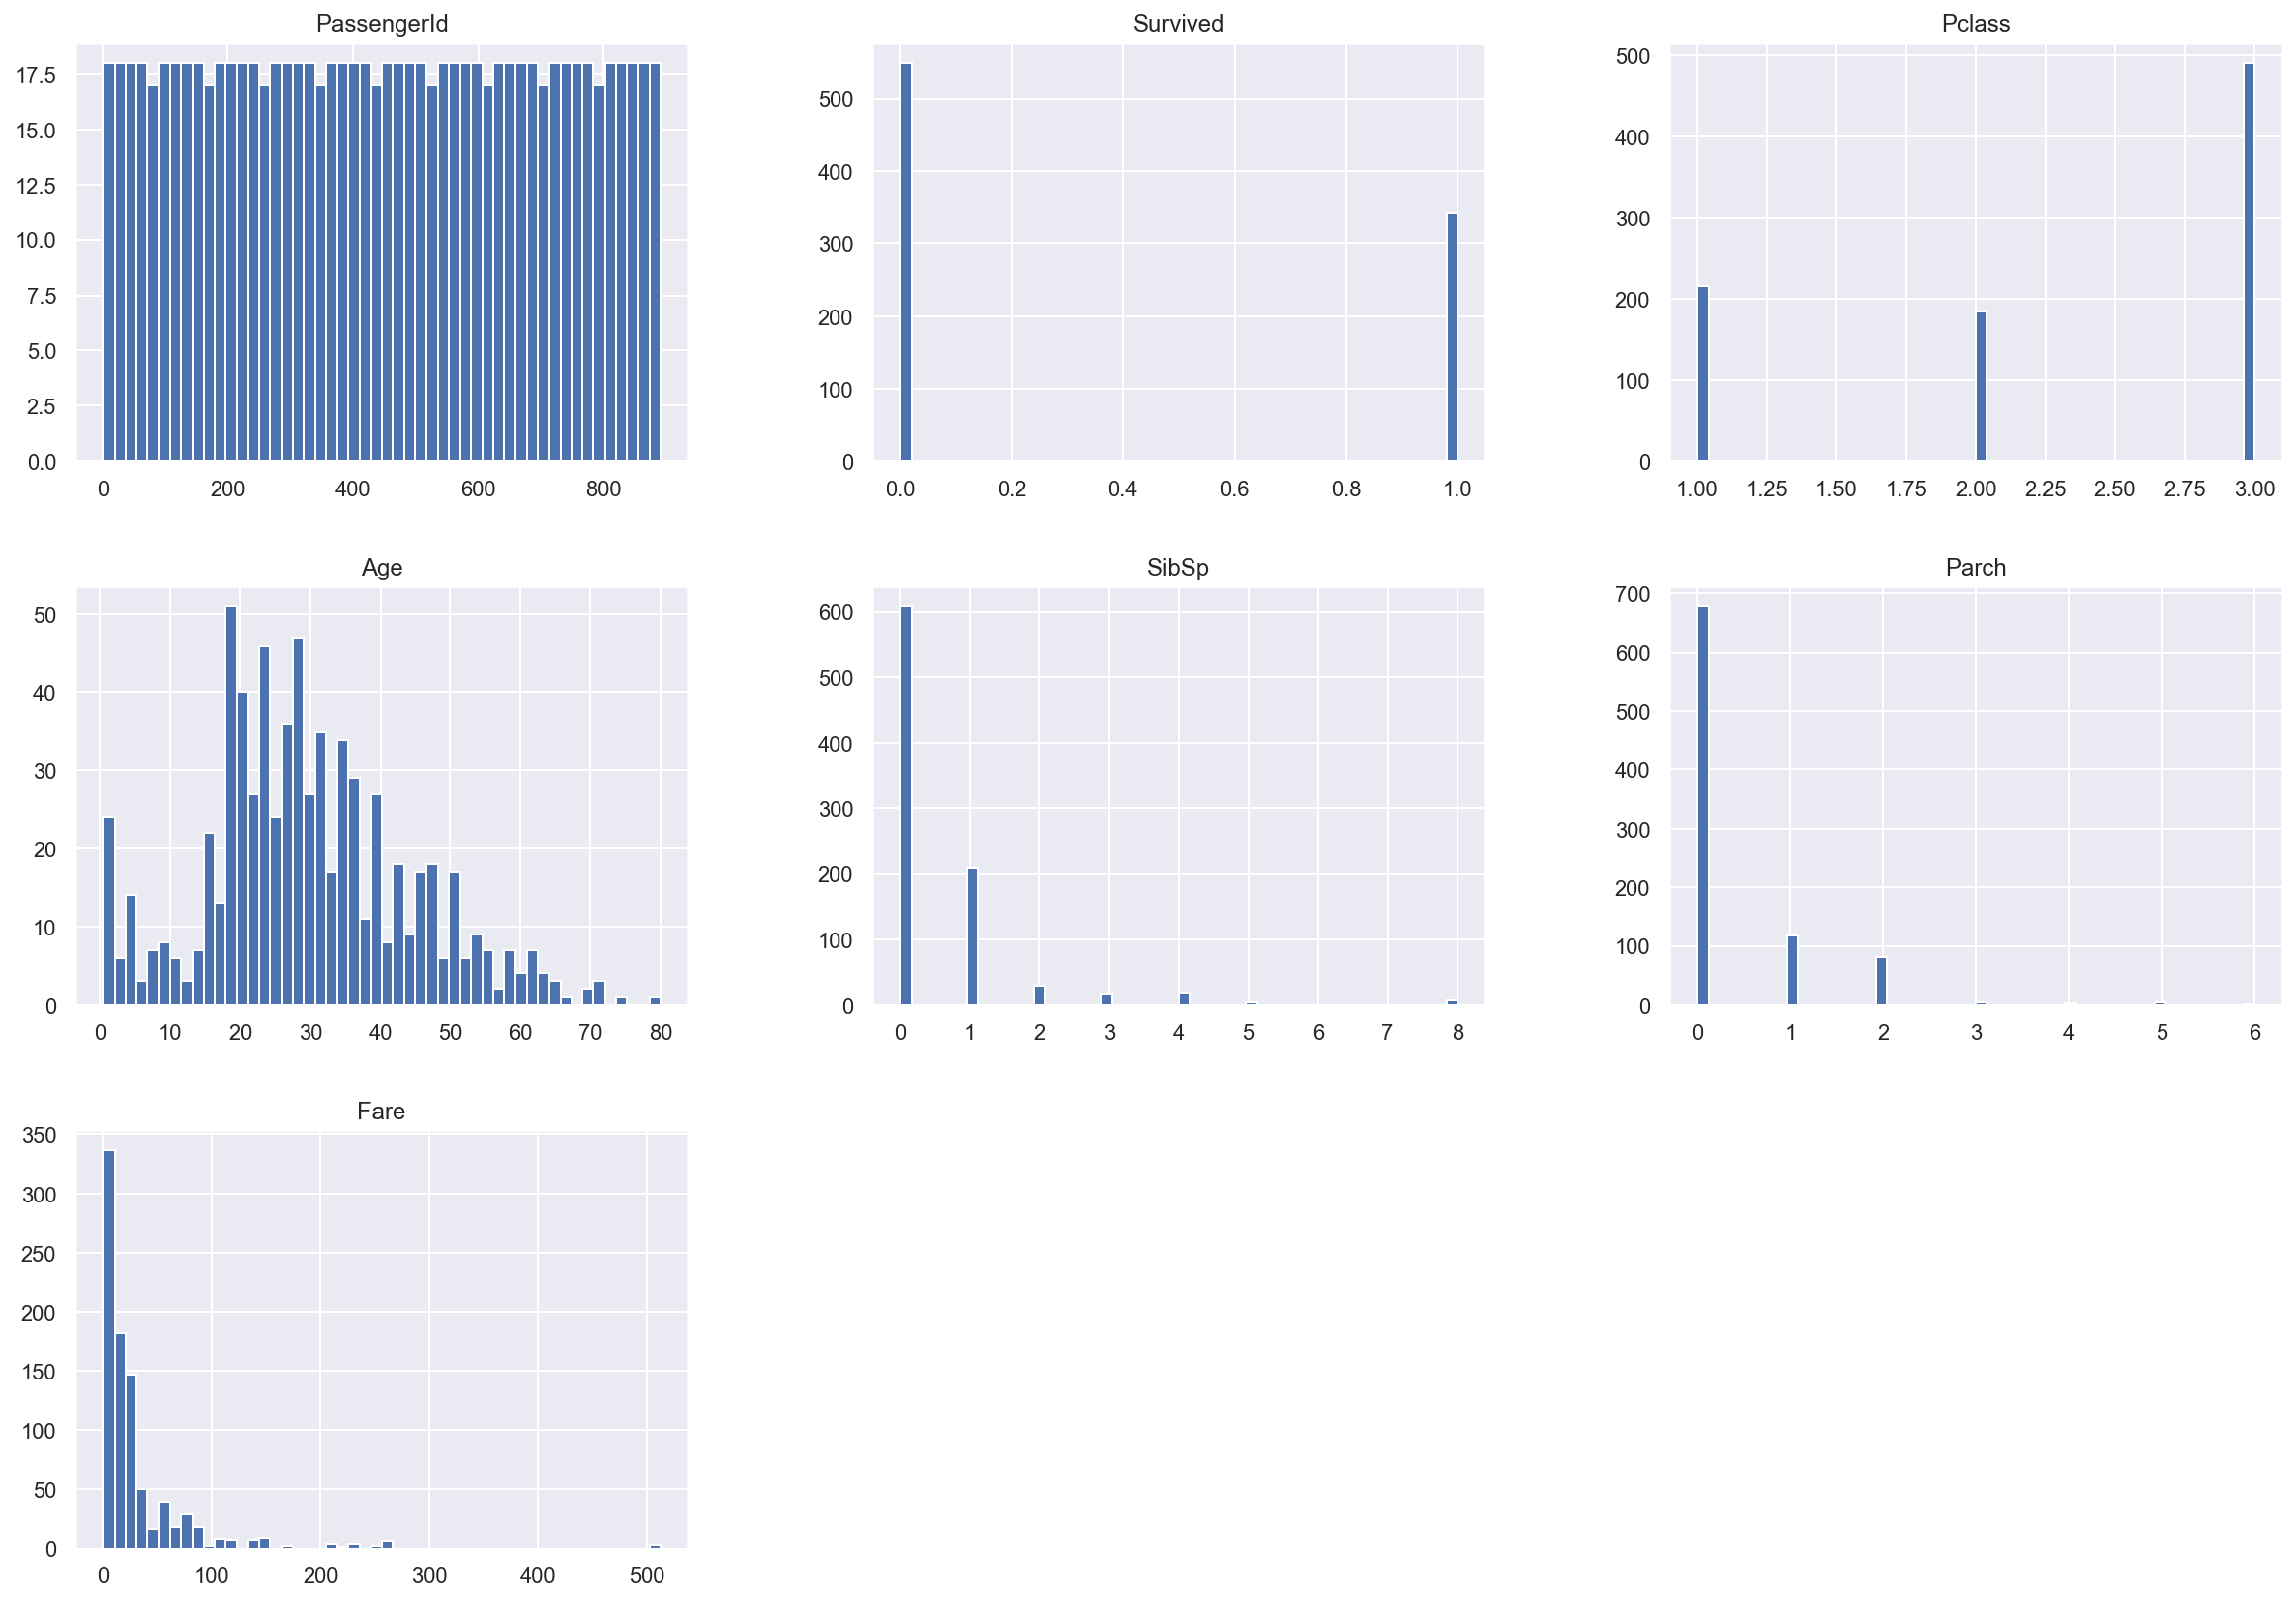

In [66]:
# YOUR CODE HERE
data.hist(bins=50, figsize=(20,14))

## Data preprocessing

### Question

Remove from the dataset columns that seem non-informative for Machine Learning.

> Hint: there are 4 of them.

In [67]:
# YOUR CODE HERE
data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

### Question

Display the first 10 samples of the cleaned dataset.

In [68]:
# YOUR CODE HERE
data[:10]

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       3    male   NaN      0      0   8.4583        Q
6         0       1    male  54.0      0      0  51.8625        S
7         0       3    male   2.0      3      1  21.0750        S
8         1       3  female  27.0      0      2  11.1333        S
9         1       2  female  14.0      1      0  30.0708        C

### Question

The **Age** feature should be very interesting for predicting survival. However, several values are missing.

Use the pandas [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to replace all `NaN` values by -1 for the **Age** feature.

In [69]:
# YOUR CODE HERE
data["Age"].fillna(-1, inplace=True)

In [70]:
data["Age"].isna().sum()

0

### Question

Use the pandas [cut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?highlight=cut#pandas.cut) function to segment the **Age** feature into categories, accodring to the provided labels and intervals.

In [71]:
age_labels = ['Missing', 'Child', 'Teenager', 'Young adult', 'Adult', 'Senior']
age_intervals = [-2, 0, 12, 18, 35, 60, 100]

# YOUR CODE HERE
data["Age"] = pd.cut(data["Age"], bins=age_intervals, labels=age_labels)

### Question

Display the first 10 samples of the dataset.

In [72]:
# YOUR CODE HERE
data[:10]

Survived  Pclass     Sex          Age  SibSp  Parch     Fare Embarked
0         0       3    male  Young adult      1      0   7.2500        S
1         1       1  female        Adult      1      0  71.2833        C
2         1       3  female  Young adult      0      0   7.9250        S
3         1       1  female  Young adult      1      0  53.1000        S
4         0       3    male  Young adult      0      0   8.0500        S
5         0       3    male      Missing      0      0   8.4583        Q
6         0       1    male        Adult      0      0  51.8625        S
7         0       3    male        Child      3      1  21.0750        S
8         1       3  female  Young adult      0      2  11.1333        S
9         1       2  female     Teenager      1      0  30.0708        C

### Question

Apply the following function to one-hot encode categorical features "Age", "Sex", "Embarked", "SibSp" and "Pclass".

In [74]:
def apply_dummies(df, column_name):

    # Codage binaire dans un nouveau DataFrame
    dummies_features = pd.get_dummies(df[column_name], prefix=column_name)
    # Concaténation du DataFrame avec les nouvelles colonnes
    df = pd.concat([df, dummies_features], axis=1)
    # Suppression de la colonne initiale
    df = df.drop(columns=[column_name])

    return df


# YOUR CODE HERE
# data = apply_dummies(data, "Sex")
# data = apply_dummies(data, "Embarked")
# data = apply_dummies(data, "SibSp")
# data = apply_dummies(data, "Pclass")
data = apply_dummies(data, "Age")

### Question

Display the first 10 samples of the dataset.

In [75]:
# YOUR CODE HERE
data[:10]

Survived  Parch     Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         0      0   7.2500           0         1           0           0   
1         1      0  71.2833           1         0           1           0   
2         1      0   7.9250           1         0           0           0   
3         1      0  53.1000           1         0           0           0   
4         0      0   8.0500           0         1           0           0   
5         0      0   8.4583           0         1           0           1   
6         0      0  51.8625           0         1           0           0   
7         0      1  21.0750           0         1           0           0   
8         1      2  11.1333           1         0           0           0   
9         1      0  30.0708           1         0           1           0   

   Embarked_S  SibSp_0  SibSp_1  ...  SibSp_8  Pclass_1  Pclass_2  Pclass_3  \
0           1        0        1  ...        0         0         0         1   
1           0        0        1  ...        0         1         0         0   
2           1        1        0  ...        0         0         0         1   
3           1        0        1  ...        0         1         0         0   
4           1        1        0  ...        0         0         0         1   
5           0        1        0  ...        0         0         0         1   
6           1        1        0  ...        0         1         0         0   
7           1        0        0  ...        0         0         0         1   
8           1        1        0  ...        0         0         0         1   
9           0        0        1  ...        0         0         1         0   

   Age_Missing  Age_Child  Age_Teenager  Age_Young adult  Age_Adult  \
0            0          0             0                1          0   
1            0          0             0                0          1   
2            0          0             0                1          0   
3            0          0             0                1          0   
4            0          0             0                1          0   
5            1          0             0                0          0   
6            0          0             0                0          1   
7            0          1             0                0          0   
8            0          0             0                1          0   
9            0          0             1                0          0   

   Age_Senior  
0           0  
1           0  
2           0  
3           0  
4           0  
5           0  
6           0  
7           0  
8           0  
9           0  

[10 rows x 24 columns]

In [102]:
ind = list(range(0, len(data)))

In [103]:
random.shuffle(ind)

891

## Model training

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

### Question 

Separate dataset between inputs and target data. Print their shapes.

In [80]:
# YOUR CODE HERE
y, X = data["Survived"].values, data.drop(columns=["Survived"]).values

In [106]:
X, y = X[ind], y[ind]

In [107]:
print(X.shape, y.shape)

(891, 23) (891,)


### Question 

Split dataset between training and test sets, using a 20% ratio for test. Print shapes of all sets.

In [108]:
# YOUR CODE HERE
num = int(len(X)*0.2)
X_train, X_test = X[num:], X[:num]
y_train, y_test = y[num:], y[:num]

In [109]:
print(X_train.shape, X_test.shape)

(713, 23) (178, 23)


### Question 

Train several Machine Learning models:

- a Logistic Regression classifier;
- a Decision Tree;

In [151]:
# YOUR CODE HERE
model_lr = LogisticRegression(solver='liblinear')
model_dt = DecisionTreeClassifier(max_depth=5)

In [152]:
# YOUR CODE HERE
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [163]:
model_dt.classes_

array([0, 1])

## Models evaluation

### Question 

Print a classification report for your models.

In [153]:
# YOUR CODE HERE
print(classification_report(y_test, model_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       113
           1       0.85      0.86      0.85        65

    accuracy                           0.89       178
   macro avg       0.88      0.89      0.89       178
weighted avg       0.89      0.89      0.89       178



In [157]:
print(classification_report(y_test, model_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       113
           1       0.90      0.83      0.86        65

    accuracy                           0.90       178
   macro avg       0.90      0.89      0.90       178
weighted avg       0.90      0.90      0.90       178



In [162]:
data[:10]

Survived  Parch     Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         0      0   7.2500           0         1           0           0   
1         1      0  71.2833           1         0           1           0   
2         1      0   7.9250           1         0           0           0   
3         1      0  53.1000           1         0           0           0   
4         0      0   8.0500           0         1           0           0   
5         0      0   8.4583           0         1           0           1   
6         0      0  51.8625           0         1           0           0   
7         0      1  21.0750           0         1           0           0   
8         1      2  11.1333           1         0           0           0   
9         1      0  30.0708           1         0           1           0   

   Embarked_S  SibSp_0  SibSp_1  ...  SibSp_8  Pclass_1  Pclass_2  Pclass_3  \
0           1        0        1  ...        0         0         0         1   
1           0        0        1  ...        0         1         0         0   
2           1        1        0  ...        0         0         0         1   
3           1        0        1  ...        0         1         0         0   
4           1        1        0  ...        0         0         0         1   
5           0        1        0  ...        0         0         0         1   
6           1        1        0  ...        0         1         0         0   
7           1        0        0  ...        0         0         0         1   
8           1        1        0  ...        0         0         0         1   
9           0        0        1  ...        0         0         1         0   

   Age_Missing  Age_Child  Age_Teenager  Age_Young adult  Age_Adult  \
0            0          0             0                1          0   
1            0          0             0                0          1   
2            0          0             0                1          0   
3            0          0             0                1          0   
4            0          0             0                1          0   
5            1          0             0                0          0   
6            0          0             0                0          1   
7            0          1             0                0          0   
8            0          0             0                1          0   
9            0          0             1                0          0   

   Age_Senior  
0           0  
1           0  
2           0  
3           0  
4           0  
5           0  
6           0  
7           0  
8           0  
9           0  

[10 rows x 24 columns]

In [158]:
from subprocess import call
from IPython.display import Image
from sklearn.tree import export_graphviz

In [159]:
def tree_image(model):
    export_graphviz(model, out_file='tree.dot', 
                feature_names = data.drop(columns=["Survived"]).columns,
                class_names = ['Dead', 'Survived'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

    # Convert to png using system command (requires Graphviz)

    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display in jupyter notebook

    return Image(filename = 'tree.png')

In [161]:
tree_image(model_dt)

### Question 

Print the confusion matrix for your models.

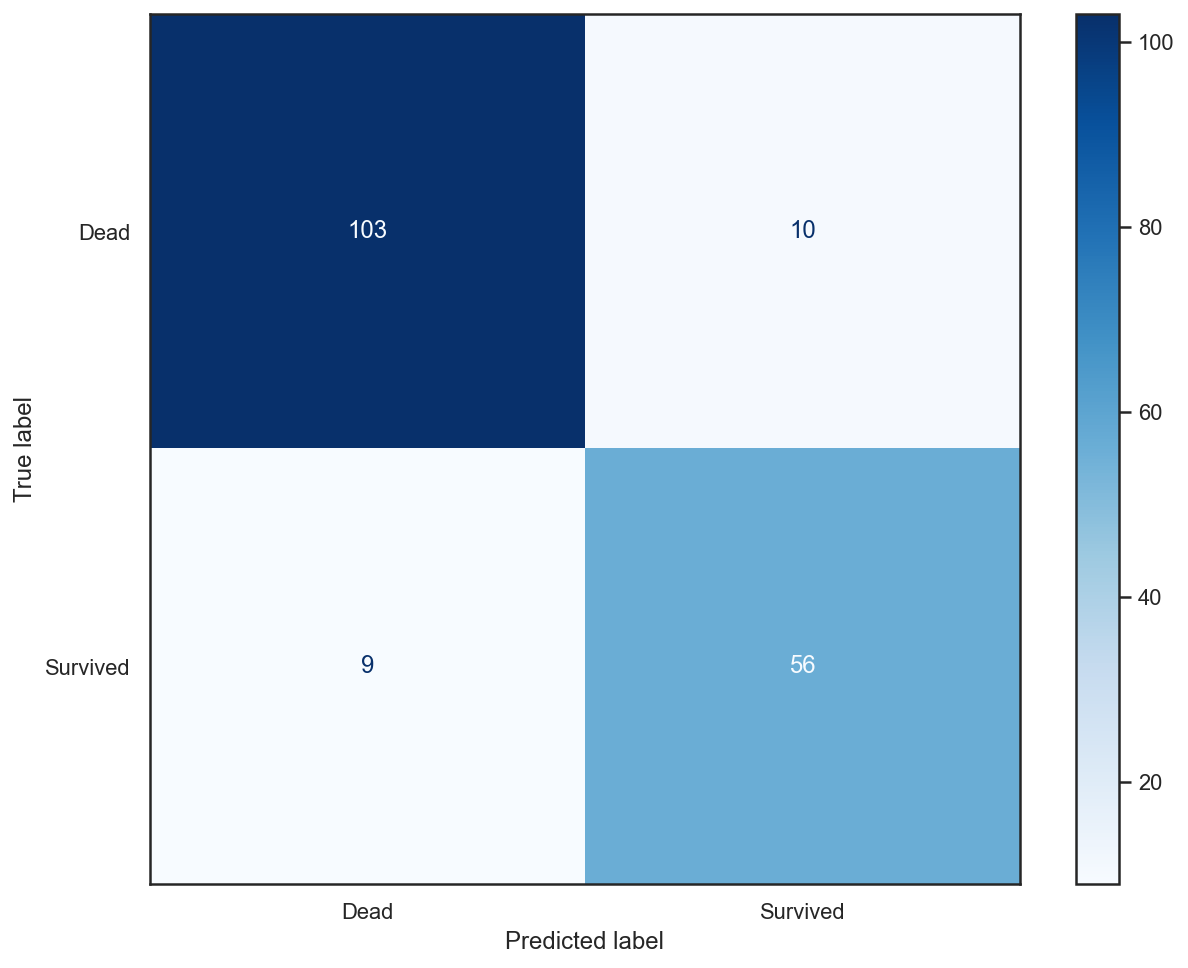

In [169]:
# Plot the confusion matrix for a model and a dataset
def plot_conf_mat(model, x, y, labels_):
    with sns.axes_style("white"):  # Temporary hide Seaborn grid lines
        display = plot_confusion_matrix(
            model, x, y, values_format="d", cmap=plt.cm.Blues, display_labels=labels_
        )

# YOUR CODE HERE

plot_conf_mat(model_lr, X_test, y_test, ["Dead", "Survived"])

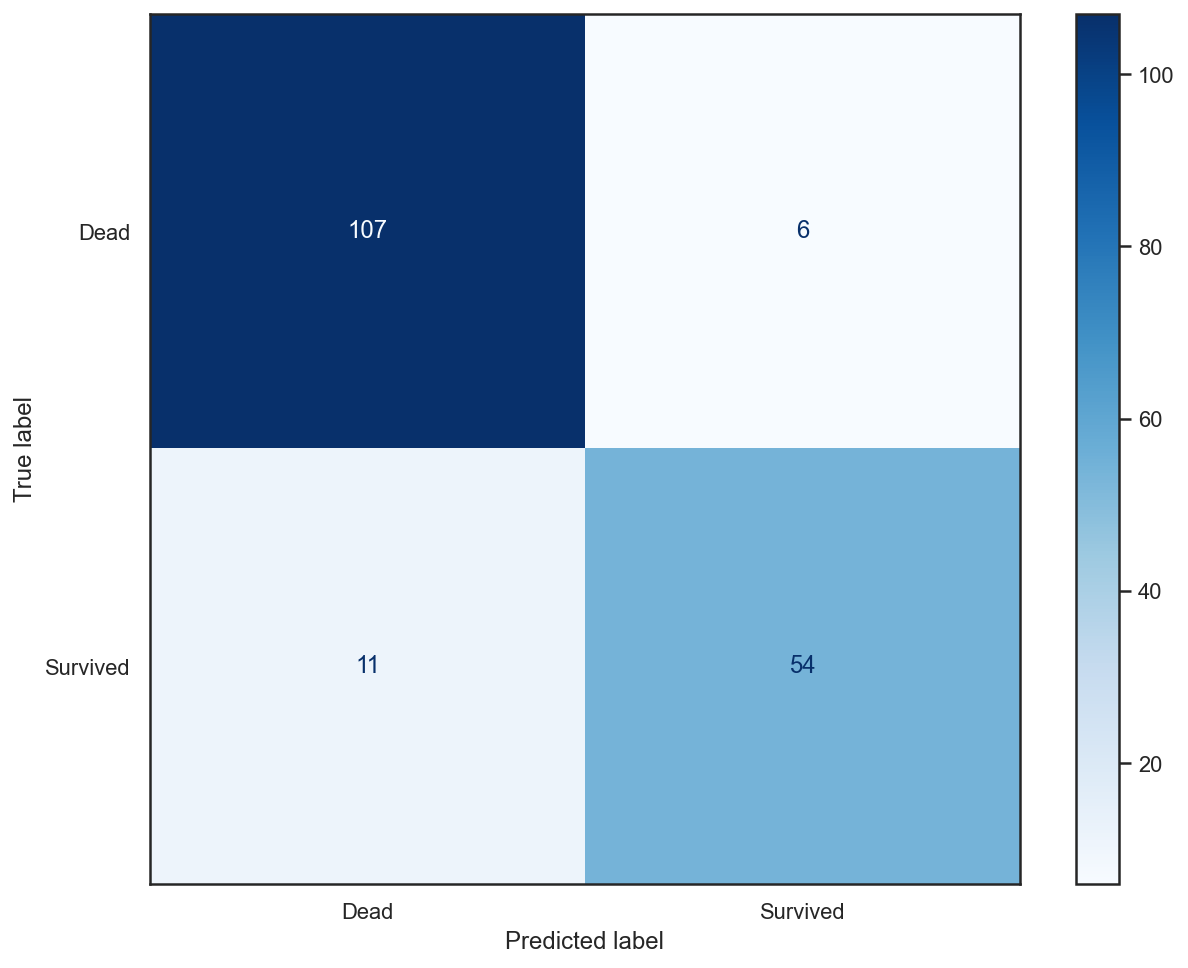

In [170]:
plot_conf_mat(model_dt, X_test, y_test, ["Dead", "Survived"])